In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sylwester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

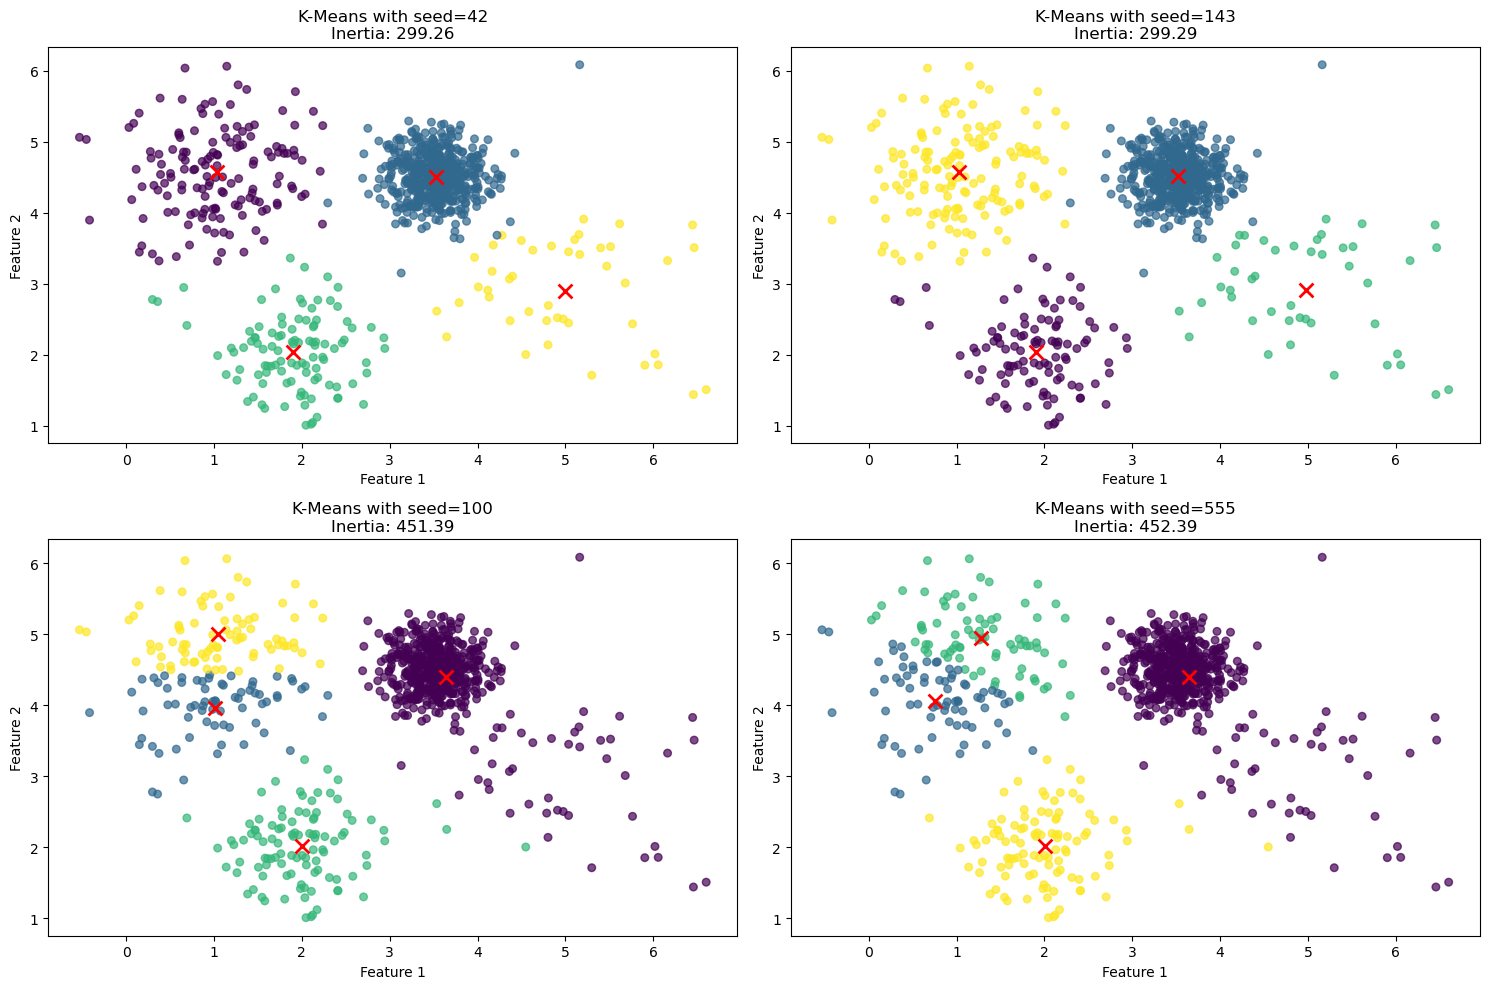

In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dataset with 4 clusters of different sizes
# We'll create clusters with 100, 50, 200, and 150 points respectively
cluster_sizes = [100, 50, 500, 150]
n_samples = sum(cluster_sizes)

# Cluster centers - positioned in a way that they're clearly separated
centers = [(2, 2), (4.75, 3), (3.5, 4.5), (1, 4.5)]

# Create a dataset where clusters are close together (more challenging for K-Means)
# X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
X, y_true = make_blobs(n_samples=cluster_sizes,
                       centers=centers,
                       cluster_std=[0.5, 0.8, 0.3, 0.6],
                       random_state=42)

# Function to plot clustering results
def plot_clusters(X, y_pred, centers, title, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, alpha=0.7)
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, linewidth=2)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Try different random seeds for K-Means initialization
seeds = [42, 143, 100, 555]  # Different random seeds to test

plt.figure(figsize=(15, 10))

for i, seed in enumerate(seeds, 1):
    # Perform K-Means with different random seeds
    kmeans = KMeans(n_clusters=4, random_state=seed, n_init=1)  # n_init=1 to emphasize seed effect
    y_pred = kmeans.fit_predict(X)

    # Plot the results
    ax = plt.subplot(2, 2, i)
    plot_clusters(X, y_pred, kmeans.cluster_centers_,
                f"K-Means with seed={seed}\nInertia: {kmeans.inertia_:.2f}", ax)

plt.tight_layout()
plt.savefig("k_means_different.png", dpi=300, bbox_inches="tight")
plt.show()